<h1>Riobocentre data</h1>
- riboswitches and RNA aptamers (https://www.ribocentre.org/)

In [14]:
import pandas as pd

import time
from selenium import webdriver
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup

In [15]:
RIBOCENTRE_FOLDER = './Ribocentre/'
datasets = []
for i in range(13):
    pth = RIBOCENTRE_FOLDER+'All_tables_'+str(i)+'.xlsx'
    ds = pd.read_excel(pth)
    datasets.append(ds)
    
ribocentredb = pd.concat(datasets, ignore_index=True)
# len(set(ribocentredb['PDB']))
ribocentredb = ribocentredb.drop_duplicates()
print(ribocentredb.shape)



(129, 11)


In [65]:
#PDB ID to sequence and secondary structure using 3DNA DSSR via RNApdbee web-server
def pdbid_2_2d_canonical(pdbid): 

    driver = webdriver.Chrome()
    #driver.implicitly_wait(30)
    
    # Open web-server
    driver.get('http://rnapdbee.cs.put.poznan.pl/')  # Replace with your target URL

    # type pdbid 
    input_pdb = driver.find_element(By.ID, "pdbId")
    input_pdb.send_keys(pdbid)

    #click Get button
    getbutton = driver.find_element(By.XPATH, "//input[@type='button' and @value='Get' and @onclick='fetchPdb()']")
    getbutton.click()

    
    time.sleep(5)

    # # pasepair identifier
    # identifier = driver.find_element(By.ID, 'fr3d')
    # identifier.click()

    #select non-canonical inclusion
    # noncancheck = driver.find_element(By.ID, "nonCanonicalHandling2")
    # noncancheck.click()
    # analyzehelices = driver.find_element(By.ID, "analyzeHelices")
    # analyzehelices.click()

    #click Run button
    runbutton = driver.find_element(By.ID, 'commitPdb')
    runbutton.click()

    # Wait for the page to load 
    time.sleep(10)

    # Get the resulting HTML
    result_html = driver.page_source
    driver.quit()

    soup = BeautifulSoup(result_html, "html.parser")
    raw_symbols = soup.findAll('span', class_='mono')
    
    syms = []

    # #print(*raw_symbols)
    for s in raw_symbols:
        syms.append(''.join(s.get_text().split()))


    # Инициализация переменных для хранения позиций и количества
    positions = []
    count = 0

    # # Поиск подстроки 'strand' в каждой строке
    # for index, line in enumerate(syms):
    #     if 'strand' in line():  # Используем lower() для нечувствительности к регистру
    #         count += 1
    #         positions.append(index)

    for j in range(len(syms)):
        if syms[j].find('strand') != -1:
            count+=1
            positions.append(j)

    positions.append(len(syms))

    resultlist = []
    for n_strand in range(count):
        strand = syms[positions[n_strand]]
        slice = syms[positions[n_strand]:positions[n_strand+1]]
        sequence = ''
        secondary = ''
        for ss in slice:
            if ss in ('a', 't', 'g', 'c', 'u', 'A', 'T', 'G', 'C', 'U'):
                sequence = sequence+ss
            elif ss in ('(', ')', '.', '[', ']', '{', '}', '-', '<', '>'):
                secondary = secondary+ss

        resultlist.append([pdbid, strand, sequence, secondary])
    
    return resultlist



    #print(syms)

    # print(type(syms))

    
    # for ss in syms:
    #     if ss in ('a', 't', 'g', 'c', 'u', 'A', 'T', 'G', 'C', 'U'):
    #         sequence = sequence+ss
    #     elif ss in ('(', ')', '.', '[', ']', '{', '}', '-', '<', '>'):
    #         secondary = secondary+ss

    # # return [pdbid, sequence, secondary]


In [68]:
rnapdbids = list(ribocentredb['PDB'])
rna_aptamers_predflist = []

for pdbid in rnapdbids:
    #rna_aptamers_predflist.append(pdbid_2_2d_noncanonical(pdbid))
    rna_aptamers_predflist = rna_aptamers_predflist + pdbid_2_2d_canonical(pdbid)
    print(len(rna_aptamers_predflist), end='-')



1-3-5-6-7-9-11-13-15-17-19-22-25-28-30-33-35-37-39-41-43-45-46-47-48-49-50-51-52-53-54-55-56-58-59-60-61-62-63-64-65-66-68-70-71-72-73-74-75-76-78-80-82-84-86-87-88-89-90-91-92-93-94-96-98-99-100-102-104-106-108-110-112-114-116-117-119-121-123-125-127-129-131-137-139-141-145-147-149-151-153-154-156-157-160-163-166-169-170-170-170-170-170-170-175-180-182-186-188-189-191-193-195-196-197-199-200-202-204-

There was an error managing chromedriver (error sending request for url (https://googlechromelabs.github.io/chrome-for-testing/known-good-versions-with-downloads.json)); using driver found in the cache


206-

There was an error managing chromedriver (error sending request for url (https://googlechromelabs.github.io/chrome-for-testing/known-good-versions-with-downloads.json)); using driver found in the cache


208-210-211-212-214-216-217-219-221-

In [69]:
rna_aptamers_predflist

[['4GXY',
  '>strand_A',
  'gGCGGCAGGUGCUCCCGACCCUGCGGUCGGGAGUUAAAAGGGAAGCCGGUGCAAGUCCGGCACGGUCCCGCCACUGUGACGGGGAGUCGCCCCUCGGGAUGUGCCACUGGCCcGAAGGCCGGGAAGGCGGAGGGGCGGCGAGGAUCCGGAGUCAGGAAACCUGCCUGCCGUc',
  '((((((((((.(((.(((.------.)).)))).....((....(((((.......)))))[[((.....)).(((...(((...(((((((.((.......(((.((((((.---))))))...))).)).)))))))......)))..]]))).....))))))))))))'],
 ['4FRG',
  '>strand_B',
  'GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGCGAAAGCAUACGGUUAUACUCCGAAUGCCACCUAGGCCA',
  '((((((....[...((((....(.((((.......)))))[[((((....)))).(((.....]])))...])))).)))))).'],
 ['4FRG',
  '>strand_X',
  'GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGCGAAAGCAUACGGUUAUACUCCGAAUGCCACCUAGGCCA',
  '((((((....[...((((....(.((((.......)))))[[((((....)))).(((.....]])))...])))).)))))).'],
 ['4FRN',
  '>strand_A',
  'GGGCUAAAAGCAUGGUGGGAAAGUGACGUGUAAUUCGUCCACAUUACUUGAUACGGUUAUACUCCGAAUGCCACCUAGCCCAAAGUAGAGCAAGGAGACUCA',
  '((((((....{..(((((....(.((((.......))))){.(([.[[[[)).(((......})))...}

In [70]:
ids = []
for a in rna_aptamers_predflist:
    ids.append(a[0])

ids = set(ids)
len(ids)

124

In [117]:
#refinement of ds aptamers
def openedbracket(s):
    br1 = s.count('(')
    br1_ = s.count(')')

    br2 = s.count('{')
    br2_ = s.count('}')

    br3 = s.count('[')
    br3_ = s.count(']')

    br4 = s.count('<')
    br4_ = s.count('>')

    if (br1 == br1_) and (br2 == br2_) and (br3 == br3_) and (br4 == br4_):
        return False
    else:
        return True
    
fordb = []
for apt in rna_aptamers_predflist:
    if not openedbracket(apt[-1]) and len(apt[-1])>4:
        fordb.append(apt)

len(fordb)

113

In [119]:
fordb = [[f[0], 'ssRNA', f[2].upper(), f[3].replace('-', '.')] for f in fordb]
db = pd.DataFrame(fordb, columns=['PDB','Strand', 'Sequence', '2D'])
db.head()
len(db.drop_duplicates())

98

<h1>Trying to handle dsRNA</h1>

In [120]:
#refinement of ds aptamers
def openedbracket(s):
    br1 = s.count('(')
    br1_ = s.count(')')

    br2 = s.count('{')
    br2_ = s.count('}')

    br3 = s.count('[')
    br3_ = s.count(']')

    br4 = s.count('<')
    br4_ = s.count('>')

    if (br1 == br1_) and (br2 == br2_) and (br3 == br3_) and (br4 == br4_):
        return False
    else:
        return True


refined = []
i =0
while i<len(rna_aptamers_predflist):
    if openedbracket(rna_aptamers_predflist[i][-1]):
        element = [rna_aptamers_predflist[i][0], 'dsRNA', rna_aptamers_predflist[i][2]+rna_aptamers_predflist[i+1][2], rna_aptamers_predflist[i][3]+rna_aptamers_predflist[i+1][3]]
        refined.append(element) 
        i+=1
        
    else:
        element = [rna_aptamers_predflist[i][0], 'ssRNA', rna_aptamers_predflist[i][2], rna_aptamers_predflist[i][3]]
        refined.append(element)

    i+=1
        


In [104]:
refined

[['4GXY',
  'ssRNA',
  'gGCGGCAGGUGCUCCCGACCCUGCGGUCGGGAGUUAAAAGGGAAGCCGGUGCAAGUCCGGCACGGUCCCGCCACUGUGACGGGGAGUCGCCCCUCGGGAUGUGCCACUGGCCcGAAGGCCGGGAAGGCGGAGGGGCGGCGAGGAUCCGGAGUCAGGAAACCUGCCUGCCGUc',
  '((((((((((.(((.(((.------.)).)))).....((....(((((.......)))))[[((.....)).(((...(((...(((((((.((.......(((.((((((.---))))))...))).)).)))))))......)))..]]))).....))))))))))))'],
 ['4FRG',
  'ssRNA',
  'GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGCGAAAGCAUACGGUUAUACUCCGAAUGCCACCUAGGCCA',
  '((((((....[...((((....(.((((.......)))))[[((((....)))).(((.....]])))...])))).)))))).'],
 ['4FRG',
  'ssRNA',
  'GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGCGAAAGCAUACGGUUAUACUCCGAAUGCCACCUAGGCCA',
  '((((((....[...((((....(.((((.......)))))[[((((....)))).(((.....]])))...])))).)))))).'],
 ['4FRN',
  'ssRNA',
  'GGGCUAAAAGCAUGGUGGGAAAGUGACGUGUAAUUCGUCCACAUUACUUGAUACGGUUAUACUCCGAAUGCCACCUAGCCCAAAGUAGAGCAAGGAGACUCA',
  '((((((....{..(((((....(.((((.......))))){.(([.[[[[)).(((......})))...}))))))))))).....

In [121]:

newrefined = []
i =0
while i<len(refined):
    if openedbracket(refined[i][-1]):
        element = [refined[i][0], 'dsRNA', refined[i][2]+refined[i+1][2], refined[i][3]+refined[i+1][3]]
        newrefined.append(element) 
        i+=1
        
    else:
        element = [refined[i][0], refined[i][1], refined[i][2], refined[i][3]]
        newrefined.append(element)

    i+=1

len(newrefined)

187

In [106]:
newrefined

[['4GXY',
  'ssRNA',
  'gGCGGCAGGUGCUCCCGACCCUGCGGUCGGGAGUUAAAAGGGAAGCCGGUGCAAGUCCGGCACGGUCCCGCCACUGUGACGGGGAGUCGCCCCUCGGGAUGUGCCACUGGCCcGAAGGCCGGGAAGGCGGAGGGGCGGCGAGGAUCCGGAGUCAGGAAACCUGCCUGCCGUc',
  '((((((((((.(((.(((.------.)).)))).....((....(((((.......)))))[[((.....)).(((...(((...(((((((.((.......(((.((((((.---))))))...))).)).)))))))......)))..]]))).....))))))))))))'],
 ['4FRG',
  'ssRNA',
  'GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGCGAAAGCAUACGGUUAUACUCCGAAUGCCACCUAGGCCA',
  '((((((....[...((((....(.((((.......)))))[[((((....)))).(((.....]])))...])))).)))))).'],
 ['4FRG',
  'ssRNA',
  'GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGCGAAAGCAUACGGUUAUACUCCGAAUGCCACCUAGGCCA',
  '((((((....[...((((....(.((((.......)))))[[((((....)))).(((.....]])))...])))).)))))).'],
 ['4FRN',
  'ssRNA',
  'GGGCUAAAAGCAUGGUGGGAAAGUGACGUGUAAUUCGUCCACAUUACUUGAUACGGUUAUACUCCGAAUGCCACCUAGCCCAAAGUAGAGCAAGGAGACUCA',
  '((((((....{..(((((....(.((((.......))))){.(([.[[[[)).(((......})))...}))))))))))).....

In [122]:

newnewrefined = []
i =0
while i<len(newrefined):
    if openedbracket(newrefined[i][-1]):
        element = [newrefined[i][0], 'dsRNA', newrefined[i][2]+newrefined[i+1][2], newrefined[i][3]+newrefined[i+1][3]]
        newnewrefined.append(element) 
        i+=1
        
    else:
        element = [newrefined[i][0], newrefined[i][1], newrefined[i][2], newrefined[i][3]]
        newnewrefined.append(element)

    i+=1

len(newnewrefined)

186

In [123]:

newnewnewrefined = []
i =0
while i<len(newnewrefined):
    if openedbracket(newnewrefined[i][-1]):
        element = [newnewrefined[i][0], 'dsRNA', newnewrefined[i][2]+newnewrefined[i+1][2], newnewrefined[i][3]+newnewrefined[i+1][3]]
        newnewnewrefined.append(element) 
        i+=1
        
    else:
        element = [newnewrefined[i][0], newnewrefined[i][1], newnewrefined[i][2], newnewrefined[i][3]]
        newnewnewrefined.append(element)

    i+=1

len(newnewnewrefined)

186

In [124]:
for a in newnewrefined:
    print(openedbracket(a[-1]))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [125]:
final = []
for a in newnewrefined:
    if len(a[2]) > 4:
        final.append(a)

print(len(final))


final = [[f[0], f[1], f[2].upper(), f[3].replace('-', '.')] for f in final]
outtable = pd.DataFrame(final, columns=['PDB','Type', 'Sequence', '2D'])
outtable.head()

142


,PDB,Type,Sequence,2D
0,4GXY,ssRNA,GGCGGCAGGUGCUCCCGACCCUGCGGUCGGGAGUUAAAAGGGAAGC...,((((((((((.(((.(((........)).)))).....((....((...
1,4FRG,ssRNA,GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGC...,((((((....[...((((....(.((((.......)))))[[((((...
2,4FRG,ssRNA,GGCCUAAAAGCAUAGUGGGAAAGUGACGUGAAAUUCGUCCAGAUGC...,((((((....[...((((....(.((((.......)))))[[((((...
3,4FRN,ssRNA,GGGCUAAAAGCAUGGUGGGAAAGUGACGUGUAAUUCGUCCACAUUA...,((((((....{..(((((....(.((((.......))))){.(([....
4,4FRN,ssRNA,GGGCUAAAAGCAUGGUGGGAAAGUGACGUGUAAUUCGUCCACAUUA...,((((((....{..(((((....(.((((.......))))){.(([....


In [126]:
outtable = outtable.drop_duplicates(subset=['PDB', 'Sequence'])
len(outtable)

124

<Axes: >

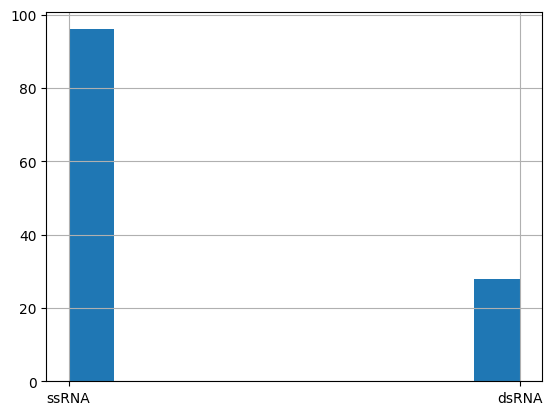

In [127]:
outtable['Type'].hist()

In [128]:
outtable.to_csv('RIBOCENTRE.csv', index=False)
